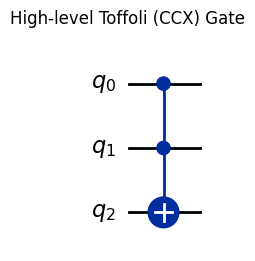

Decomposed Toffoli circuit using basic gates:


<Figure size 640x480 with 0 Axes>

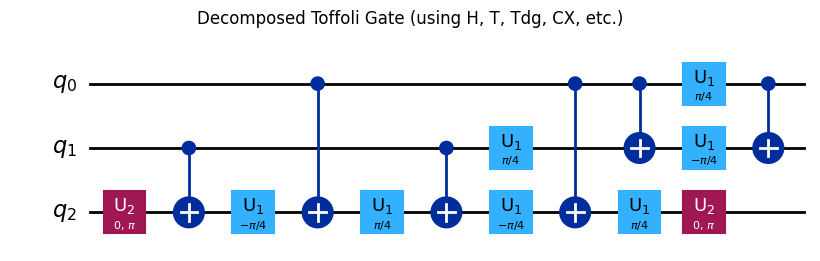

In [3]:
# ------------------------------------------------------------
# Toffoli (CCX) Gate Decomposition in Qiskit
# This notebook demonstrates how to implement and visualize the decomposition
# of a 3-qubit Toffoli (CCX) gate into a sequence of basic gates supported by quantum hardware (like IBMQ devices). 
# Since most real quantum hardware does not support CCX natively, it is transpiled into smaller gates: H, T, Tdg,
# and CX. We will visualize both the high-level and decomposed circuits.
# ------------------------------------------------------------

from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_circuit_layout
import matplotlib.pyplot as plt

%matplotlib inline

# Step 1: Create a 3-qubit quantum circuit with a Toffoli gate
qc = QuantumCircuit(3, name="Toffoli")
qc.ccx(0, 1, 2)  # Toffoli gate: control qubits 0 and 1, target qubit 2

# Step 2: Visualize the high-level Toffoli gate (before decomposition)
high_level_circuit = qc.draw(output='mpl')
plt.title("High-level Toffoli (CCX) Gate")
plt.show()

# Step 3: Transpile the circuit to decompose the Toffoli gate
# We specify basis gates supported by hardware: u1, u2, u3, cx
backend = Aer.get_backend('qasm_simulator')
decomposed_qc = transpile(qc, backend=backend, basis_gates=['u1', 'u2', 'u3', 'cx'], optimization_level=0)

# Step 4: Visualize the decomposed Toffoli circuit
print("Decomposed Toffoli circuit using basic gates:")
plt.figure()
decomposed_circuit = decomposed_qc.draw(output='mpl')
plt.title("Decomposed Toffoli Gate (using H, T, Tdg, CX, etc.)")
plt.show()
# ------------------------------------------------------------
# Notes:
# - The Toffoli gate flips the target qubit only if both controls are |1⟩.
# - It is essential in quantum logic and error correction.
# - This decomposition allows execution on hardware that doesn't support CCX natively.
# - The transpiler breaks CCX into elementary gates compatible with real devices.
# ------------------------------------------------------------
# Think of It This Way:
# Imagine you want to build a 3-input logic circuit but you're only allowed to use:
# 2-input logic gates
# Basic signal shifters (phase adjusters)
# You need a clever combination of those tools to build your full logic. That's what Qiskit’s transpiler is doing under the hood.